# Basic Iris EDA

Once we know how to load and preprocess the `iris.data` file ([Notebook here](notebooks/iris/1.\ Read\ the\ data.ipynb)), we can continue by doing a simple explanatory data analysis (EDA) and data visualization.

## Notebook Techologies

In this section we explain the tecnologies and python packages that we are going to using throuout the kernel. We only explain the *never seen* technologies in this project. For instance, now, we are going to skip `pandas` explanation because we have already explained it inside a previous notebook.

In this notebook we are going to use:

- `matplotlib`: It is a Python package that provides a simple to use API to generate high valuable plots such as, scatter plots, bar plots...
- `scikit-learn`: It is a python package that provides Simple and efficient tools for predictive data analysis. 

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
DATA_PATH = Path('../../data/processed')

In [3]:
df = pd.read_csv(DATA_PATH / 'iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Taking a look at the flowers

Our dataset does not contain images (as expected since it is a csv file), but we think that taking a look to external sources may be helpful when trying to understand a dataset.

For this reason we looked for Iris Flower images.

![Iris Flowers](img/iris.png)

By just looking at the three images we come up with a slightly idea on how each Iris flower class looks like, and most importanly we can differentiate between sepals and petals. *Before starting this project we didn't really know what a sepal was.* 

## Basic Statistics of the data

We think that before starting with quite "complex" plots, we should describe our dataset. At least, knowing the possible values that categorical variables can take and knowing the distribution describing the quantitative variables is really valuable.

In this dataset we have only a single categorical variable, which is Flower Type, named as `class` in the DataFrame.

In [13]:
unique_labels = df['class'].unique()
print('Unique values for Flower type (`class` column):', ','.join(unique_labels))

Unique values for Flower type (`class` column): Iris-setosa,Iris-versicolor,Iris-virginica


In the following figure we can see, that we exactly have 50 instances for each flower type.

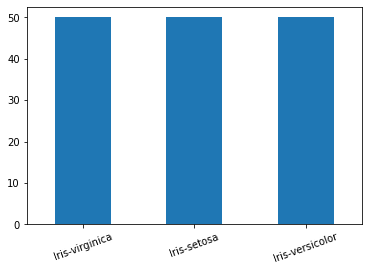

In [23]:
df['class'].value_counts().plot.bar(rot=20);

In the other hand, we have the remaining variables which are quantitative. A good practice to describe the quantitative variables is by plotting its distribution and giving the values describing the distribution and its center.

In [30]:
q_vars = df.drop('class', axis='columns')
q_vars.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


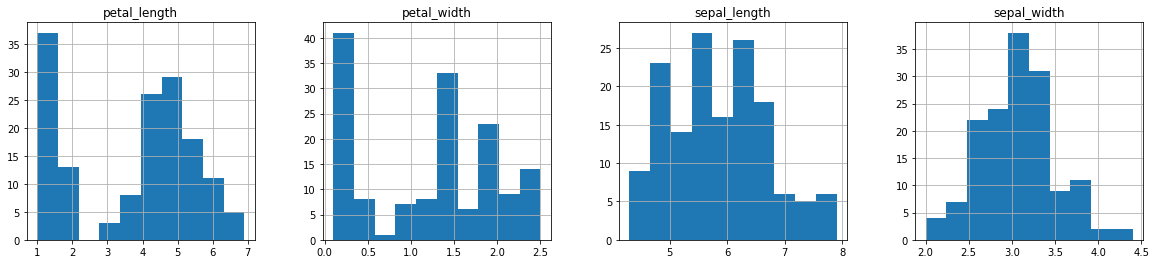

In [29]:
q_vars.hist(layout=(1, 4), figsize=(20, 4));

## Taking a further look at the data

When we statistically analyze a dataset, we can classify our columns in multiple types. One way to do so is spliting explatory from response variables. In this case, the explanatory variables are the **widths and lengths** from the flowers, and the response variable is the **Iris class**. Threfore, in our basic anlysis we are going to try to figure out in which way the widths and lengths determine the flower class. In other words, we are going to check if a relationship exists between the withds and lengths of the flower with the flower class. 

Since, all explanatory variables are quantitative and the response variable is categorical, we can plot a side-by-side boxplot for each quantitative variable.

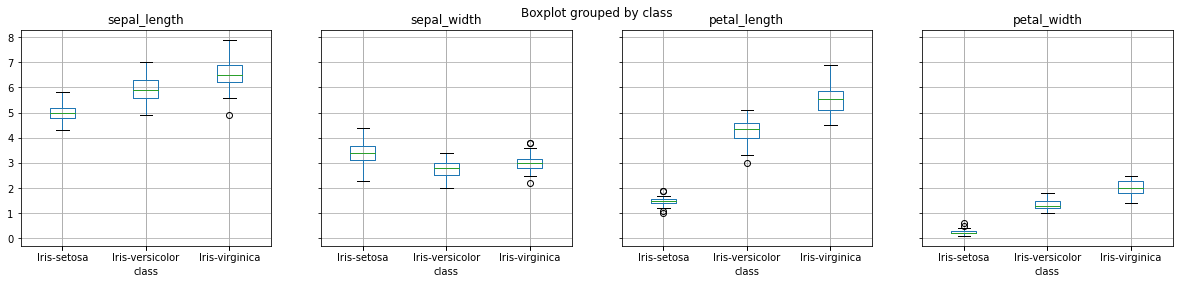

In [4]:
df.boxplot(['sepal_length', 'sepal_width', 
            'petal_length', 'petal_width'], 
            by='class',
            figsize=(20, 4), layout=(1, 4));

For `speal_length`, `petal_length` and `petal_width` we can see linear increasing trend being the Iris setosa the flower type that has the lowest values and the Iris virginica the largests. To further explore this trend, we plot an scatter plot of the sepal and petal length.

In [5]:
df['class'].astype('category').cat.categories

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

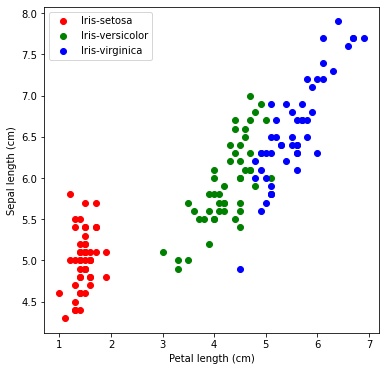

In [6]:
plt.figure(figsize=(6, 6))

for c, colors in zip(df['class'].unique(), 'rgb'):
    plt.scatter(df[df['class'] == c].petal_length, 
                df[df['class'] == c].sepal_length,
                label=c, c=colors)

plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.legend();

And as expected the Iris With largest petals and sepal lengths are usually Iris Virginicas and the Flowers with lowest petal and sepal lengths are Iris Setosas. Also, by looking the scatter plot we can see the mentioned linear relationship.

With pandas we can easily compute the pearson correlation.

In [7]:
pcrr = df.sepal_length.corr(df.petal_length)
print('Pearson Correlation between Sepal and Petal Length:', pcrr)

Pearson Correlation between Sepal and Petal Length: 0.8717541573048712


Finally, it will be really useful if we could plot all four features at once and see how them influence on the response variable flower type. We cannot do this with a single step, this is because we cannot generate a scatter plot with 4 dimentions. Fortunately, there exists a technique called Principal Component Analysis (PCA) which allow us to reduce the features dimentionality without loosing so much information.

To apply PCA to our data, we are going to use `sklearn` package.

In [8]:
pca = PCA(n_components=2)
reduced_iris = df.drop('class', axis='columns').values

print('Shape before PCA:', reduced_iris.shape)

reduced_iris = pca.fit_transform(reduced_iris)

print('Shape after PCA:', reduced_iris.shape)

Shape before PCA: (150, 4)
Shape after PCA: (150, 2)


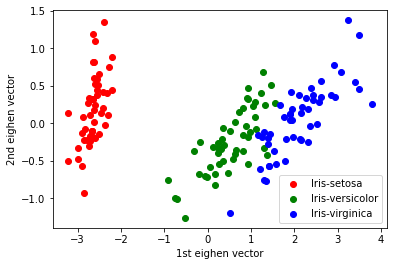

In [9]:
classes = df['class'].astype('category')

class_ids = classes.cat.codes
class_ids = np.expand_dims(class_ids, axis=-1)

class_names = classes.cat.categories

reduced_iris = np.concatenate(
    (reduced_iris, class_ids), axis=-1)

for c, n, colors in zip(np.unique(class_ids), class_names, 'rgb'):
    plt.scatter(reduced_iris[reduced_iris[:, -1] == float(c), 0], 
                reduced_iris[reduced_iris[:, -1] == float(c), 1],
                label=n, c=colors)

plt.xlabel('1st eighen vector')
plt.ylabel('2nd eighen vector')
plt.legend();

In [ ]:
Ploting the 4 features at once with 2 PCA components show even grater differences between flower types.

## References

\[1\] [Matplotlib documentation](https://matplotlib.org/)

\[2\] [Scikit Learn Documentation](https://scikit-learn.org/stable/)